
### Libraries
#### Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Dataset
#### Load the dataset

In [3]:
columns = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('sentiment140.csv', encoding='ISO-8859-1', header=None, names=columns)


#### Explore the dataset

In [4]:

print("First few rows of the dataset:")
display(df.head())


First few rows of the dataset:


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
print("Last few rows of the dataset:")
display(df.tail())

Last few rows of the dataset:


,target,ids,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


#### Check basic information about the DataFrame

In [6]:
print("\nInformation about the dataset:")
display(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


None


#### Shape of the DataFrame

In [7]:
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(1600000, 6)


#### Check for missing values

In [8]:

print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64



#### Explore the distribution of the target variable

In [9]:

print("\nDistribution of the 'target' column:")
print(df['target'].value_counts())


Distribution of the 'target' column:
0    800000
4    800000
Name: target, dtype: int64


#### Visualize the positive and negative text

In [10]:
from wordcloud import WordCloud


positive_text = ' '.join(df[df['target'] == 4]['text'])
negative_text = ' '.join(df[df['target'] == 0]['text'])


wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiments')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiments')
plt.axis('off')

plt.show()

ModuleNotFoundError: No module named 'wordcloud'

#### Explore the 'text' column

In [11]:
print("\nSample text from the 'text' column:")
display(df['text'].head())


Sample text from the 'text' column:


0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [12]:

df['text_length'] = df['text'].apply(len)
print("\nStatistics of text lengths:")
print(df['text_length'].describe())


Statistics of text lengths:
count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_length, dtype: float64


#### Explore the length of the text

##### Visualize the distribution of text lengths

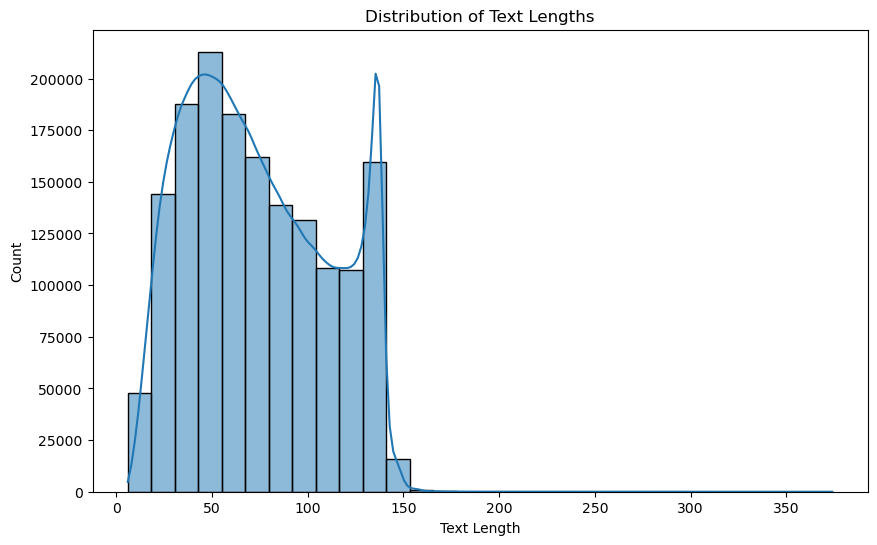

In [13]:

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


visualization of text length with and without noise

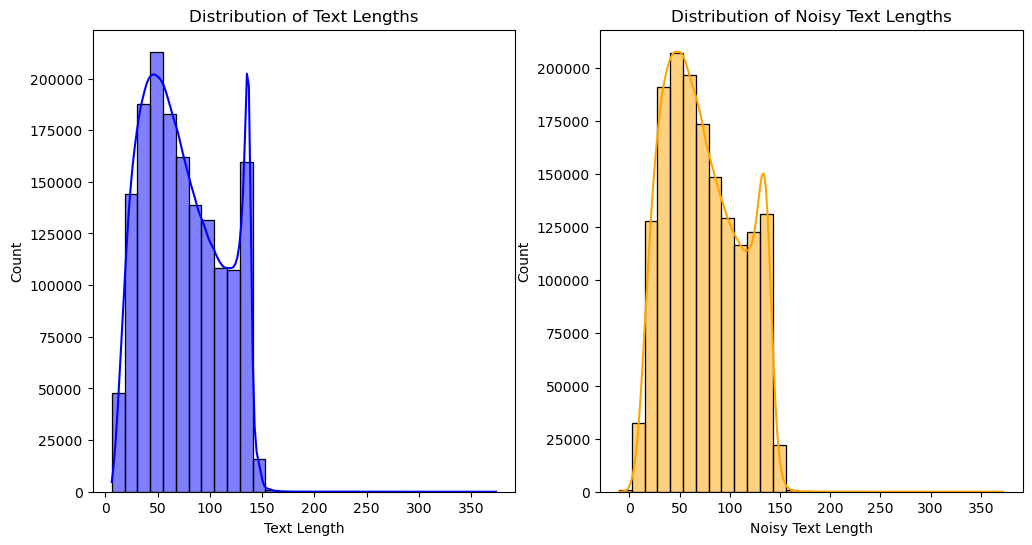

In [14]:
np.random.seed(42)
noise = np.random.normal(0, 5, df.shape[0])  
df['noisy_text_length'] = df['text_length'] + noise

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['noisy_text_length'], bins=30, kde=True, color='orange')
plt.title('Distribution of Noisy Text Lengths')
plt.xlabel('Noisy Text Length')
plt.ylabel('Count')

plt.show()

 Visualize the presence of duplicate text

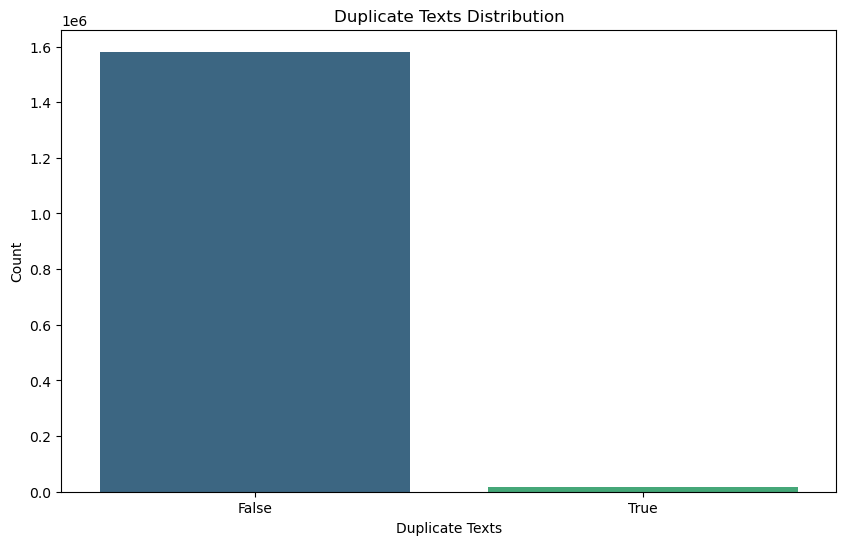

In [15]:

plt.figure(figsize=(10, 6))
sns.countplot(x=df.duplicated(subset='text'), palette='viridis')
plt.title('Duplicate Texts Distribution')
plt.xlabel('Duplicate Texts')
plt.ylabel('Count')
plt.show()


#### Check unique target

In [16]:
print("\nClass distribution:")
print(df['target'].value_counts())


Class distribution:
0    800000
4    800000
Name: target, dtype: int64



#### Plot the class distribution

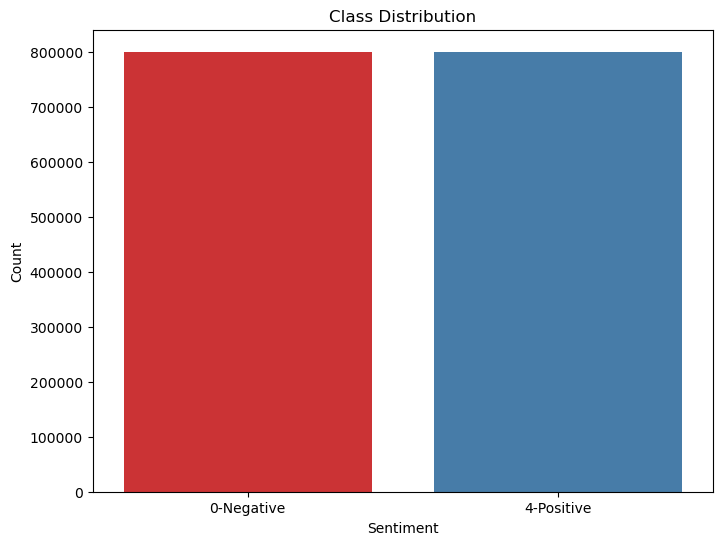

In [17]:

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0-Negative', '4-Positive'])  # Set custom x-axis labels
plt.show()


#### Visualize the relationship between text length and target

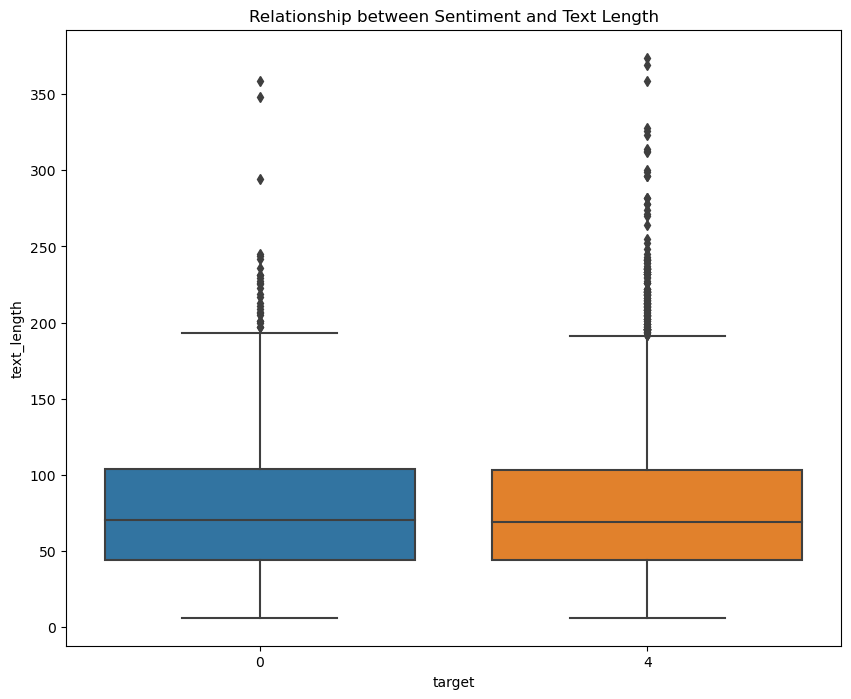

In [18]:

plt.figure(figsize=(10, 8))
sns.boxplot(x='target', y='text_length', data=df)
plt.title('Relationship between Sentiment and Text Length')
plt.show()

#### Identify and display pairs of duplicate text

In [28]:
duplicate_pairs = df[df.duplicated(subset='text', keep=False)]
duplicate_pairs = duplicate_pairs.sort_values(by='text')


#### Display the pairs of duplicate text

In [29]:
print("Pairs of Duplicate Text:")
display(duplicate_pairs[['text']])

Pairs of Duplicate Text:


,text
271472,David must be hospitalized for five days end...
271505,David must be hospitalized for five days end...
1132076,bathroom is clean..... now on to more enjoya...
1132074,bathroom is clean..... now on to more enjoya...
540159,#IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #...
...,...
458170,"zofran is not making this work day any easier,..."
464810,~ get SUICIDE !!
463926,~ get SUICIDE !!
1170868,~~~X0X0~~~!!!X0X0!!! I love you!!! &amp;...


#### Drop the duplicate text

In [30]:
df_deduplicated = df.drop_duplicates()
df_deduplicated_text = df.drop_duplicates(subset='text')

#### Print the shape of the original and deduplicated DataFrames

In [31]:
print("Original DataFrame Shape:", df.shape)
print("Deduplicated DataFrame Shape:", df_deduplicated.shape)
df_deduplicated_text['target'].value_counts()

Original DataFrame Shape: (1600000, 2)
Deduplicated DataFrame Shape: (1583691, 2)


4    791281
0    790185
Name: target, dtype: int64

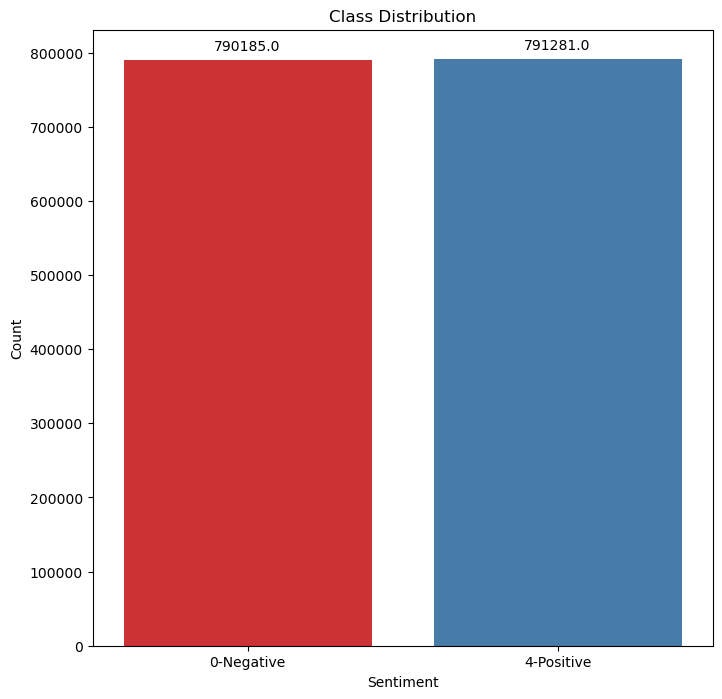

In [32]:

plt.figure(figsize=(8, 8))
ax = sns.countplot(x='target', data=df_deduplicated_text, palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0-Negative', '4-Positive'])  # Set custom x-axis labels
#
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


## Preprocessing
#### Drop unnecessary columns

In [33]:
df = df[['target', 'text']]
df.head()


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


#### Handle missing values (if any)

In [34]:

df.dropna(inplace=True)


#### Text cleaning and preprocessing

In [35]:


import re

stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
    'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
    'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both',
    'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
    's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn',
    'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'
])
# Custom lemmatization dictionary for positive and negative words
custom_lemmatization_rules = {
    'amazing': 'amaze',
    'better': 'good',
    'excellent': 'excel',
    'fantastic': 'fantastic',
    'good': 'good',
    'great': 'great',
    'happy': 'happy',
    'love': 'love',
    'positive': 'positive',
    'wonderful': 'wonderful',
    'splendid': 'splendid',
    'superb': 'superb',
    'marvelous': 'marvelous',
    'outstanding': 'outstanding',
    'terrific': 'terrific',
    'delightful': 'delightful',
    'amazing': 'amazing',
    'magnificent': 'magnificent',
    'joyous': 'joyous',
    'impressive': 'impressive',
    'fabulous': 'fabulous',

    'awful': 'awful',
    'bad': 'bad',
    'disappointing': 'disappoint',
    'horrible': 'horrible',
    'negative': 'negative',
    'poor': 'poor',
    'terrible': 'terrible',
    'unhappy': 'unhappy',
    'terrible': 'terrible',
    'miserable': 'miserable',
    'sad': 'sad',
    'gloomy': 'gloomy',
    'unsatisfactory': 'unsatisfactory',
    'dreadful': 'dreadful',
    'unpleasant': 'unpleasant',
    'distressing': 'distress',
    'disheartening': 'dishearten',
    'frustrating': 'frustrate',
    'annoying': 'annoy',
    'irritating': 'irritate',
    'regrettable': 'regret',
    'negative': 'negative',
    'unpleasant': 'unpleasant',
    'dismal': 'dismal',
    'depressing': 'depress',
    'displeasing': 'displease',
    'disgusting': 'disgust',
   
}

# Lemmatization function
def custom_lemmatize(word):
    return custom_lemmatization_rules.get(word, word)


def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove common punctuation as delimiters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Numerical character removal
    text = re.sub('[0-9]+', '', text)
    
    # Remove extra whitespaces
    text = ' '.join(text.split())

    # Removing user@ references and #
    text = re.sub(r'\@\w+|\#\w+', '', text)

    # Tokenization (simple split)
    filtered_list = text.split()

        # Stopword removal
    filtered_list = [word for word in filtered_list if word not in stop_words]
    
    # Lemmatization
    filtered_list = [custom_lemmatize(word) for word in filtered_list]

    cleaned_text = " ".join(filtered_list)
    
    
    return cleaned_text

dirty_text = "Hello!   This is an excellent good better example text with some 123 special characters and a URL http://example.com"
cleaned_text = clean_text(dirty_text)

print("Original Text:", dirty_text)
print("Cleaned and Lemmatized Text:", cleaned_text)

Original Text: Hello!   This is an excellent good better example text with some 123 special characters and a URL http://example.com
Cleaned and Lemmatized Text: hello excel good good example text special characters url


In [36]:

df_deduplicated_text['cleaned_text'] = df_deduplicated_text['text'].apply(clean_text)
display(df_deduplicated_text['cleaned_text'])

0          switchfoot thats bummer shoulda got david carr...
1          upset cant update facebook texting might cry r...
2          kenichan dived many times ball managed save re...
3                           whole body feels itchy like fire
4                   nationwideclass behaving im mad cant see
                                 ...                        
1599995                        woke school best feeling ever
1599996              thewdbcom cool hear old walt interviews
1599997                      ready mojo makeover ask details
1599998    happy th birthday boo alll time tupac amaru sh...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: cleaned_text, Length: 1581466, dtype: object

#### Encoding the target 

In [37]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_deduplicated_text['target_encoded'] = label_encoder.fit_transform(df_deduplicated_text['target'])
df_deduplicated_text['target_encoded']


0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target_encoded, Length: 1581466, dtype: int64

In [38]:
df_deduplicated_text['target_encoded'].value_counts()

1    791281
0    790185
Name: target_encoded, dtype: int64

#### Get sample dataset from 1.6 milliol dataset

In [39]:

max_sample_size = 1000000
subset_df = df_deduplicated_text.groupby('target').apply(lambda x: x.sample(n=max_sample_size // 2)).reset_index(drop=True)
subset_df['target'].value_counts()

0    500000
4    500000
Name: target, dtype: int64

#### Split the subset DataFrame into training and testing sets

In [40]:


model = make_pipeline(TfidfVectorizer())

param_grid = {
    'tfidfvectorizer__max_features': [85,90,95,100,110,120],  
    
}

In [41]:

X_train, X_test, y_train, y_test = train_test_split(subset_df['cleaned_text'], subset_df['target_encoded'], test_size=0.3, random_state=42)


In [42]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer())]),
             param_grid={'tfidfvectorizer__max_features': [85, 90, 95, 100, 110,
                                                           120]},
             scoring='accuracy')

In [43]:
best_params_ = grid_search.best_params_
print("Best Hyperparameters :", best_params_)

Best Hyperparameters : {'tfidfvectorizer__max_features': 85}


In [44]:
best_max_features = best_params_['tfidfvectorizer__max_features']

In [45]:
vectorizer = TfidfVectorizer(max_features=best_max_features,min_df=2, max_df=0.8)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Naive Bayes Classifier

#### Hyperparameter tuning for Naive Bayes

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB



param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0,5,10,15,20,25,30, 35,40,44,45,50,55,60,65,75,100,110,115,120]}
nb_classifier_tuned = GridSearchCV(MultinomialNB(), param_grid, cv=5)
nb_classifier_tuned.fit(X_train_tfidf, y_train)

# Best hyperparameter
best_alpha = nb_classifier_tuned.best_params_['alpha']




#### Model Implimentation with best parameters

In [47]:
nb_classifier = MultinomialNB(alpha=best_alpha)
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=15)


#### Cross-validation

In [48]:

nb_cross_val_scores = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv=5)
print('Naive Bayes Cross-Validation Scores:', nb_cross_val_scores)

Naive Bayes Cross-Validation Scores: [0.63882857 0.64092143 0.6375     0.63778571 0.63730714]


In [49]:
print("Mean Accuracy:", nb_cross_val_scores.mean())

Mean Accuracy: 0.6384685714285714


#### Predict on the train set

In [50]:

nb_predictions_train = nb_classifier.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train,nb_predictions_train)
train_accuracy


0.6385942857142857

#### Predict on the test set

In [51]:

nb_predictions = nb_classifier.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test,nb_predictions)
test_accuracy

0.6385666666666666

#### Evaluate the model

In [52]:

nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_classification_report = classification_report(y_test, nb_predictions)
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
nb_confusion_matrix

array([[112475,  37338],
       [ 71092,  79095]], dtype=int64)

#### Plot confusion marix

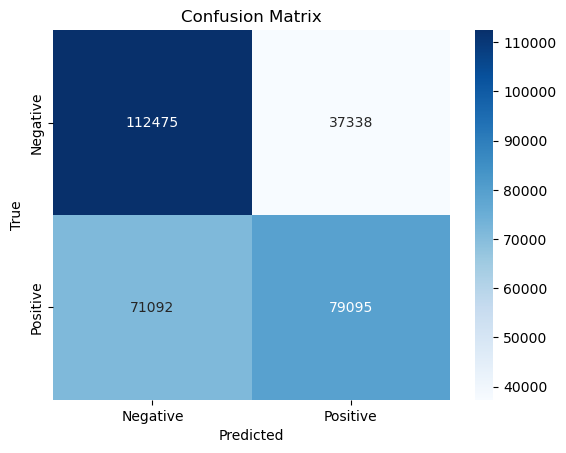

In [53]:
conf_matrix = confusion_matrix(y_test, nb_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### Display results

In [54]:


print(f'Naive Bayes Accuracy: {nb_accuracy:.2f}')
print('Naive Bayes Classification Report:')
print(nb_classification_report)
print('Naive Bayes Confusion Matrix:')
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.64
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.75      0.67    149813
           1       0.68      0.53      0.59    150187

    accuracy                           0.64    300000
   macro avg       0.65      0.64      0.63    300000
weighted avg       0.65      0.64      0.63    300000

Naive Bayes Confusion Matrix:
[[112475  37338]
 [ 71092  79095]]
